In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('datasets/clean_web_traffic.csv')

In [35]:
df.head(20)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
5,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,74.0,39.0,11.0,55.0,71.0,44.0,25.0,39.0,25.0,50.0
6,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,53.0,107.0,63.0,42.0,24.0,44.0,33.0,52.0,21.0,48.0
7,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,20.0,16.0,22.0,19.0,21.0,32.0,34.0,29.0,23.0,25.0
8,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,...,10.0,13.0,8.0,16.0,6.0,12.0,6.0,8.0,6.0,13.0
9,All_your_base_are_belong_to_us_zh.wikipedia.or...,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,...,7.0,4.0,5.0,10.0,7.0,4.0,2.0,6.0,2.0,22.0


In [36]:
# Display the first few rows of the DataFrame
print(df.head())

# Get the dimensions of the DataFrame
print(df.shape)

# Basic information about the dataset
print(df.info())


                                         Page  2015-07-01  2015-07-02  \
0     2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1      2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2       3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3  4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4     5566_zh.wikipedia.org_all-access_spider        12.0         7.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         4.0         5.0        20.0         8.0         5.0        17.0   

   2015-07-09  ...  2017-09-01  2017-09-02  2017-09-03  2017-09-04  \
0        26.0  ...        19

In [37]:
# Summary statistics for numerical columns
print(df.describe())


         2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.150840e+05  1.150840e+05  1.150840e+05  1.150840e+05  1.150840e+05   
mean   1.226486e+03  1.235009e+03  1.162587e+03  1.196862e+03  1.247226e+03   
std    7.560681e+04  7.710332e+04  7.239662e+04  7.542247e+04  7.671463e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+01  1.900000e+01  1.800000e+01  1.900000e+01  1.900000e+01   
50%    1.290000e+02  1.280000e+02  1.250000e+02  1.240000e+02  1.350000e+02   
75%    5.520000e+02  5.470000e+02  5.310000e+02  5.120000e+02  5.690000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.150840e+05  1.150840e+05  1.150840e+05  1.150840e+05  1.150840e+05   
mean   1.325214e+03  1.270968e+03  1.225998e+03  1.234100e+03  1.226963e+03   
std    8.379165e+04  7.875964e+04  7.100171e+04  7.

### The dataset is to big for our machines. We will only pick 10 pages but keep all the dates

In [38]:
file_path = 'datasets/clean_web_traffic.csv'
random.seed(42)  
df = pd.read_csv(file_path)
selected_pages = random.sample(list(df['Page']), 10)
df = df[df['Page'].isin(selected_pages)]
df = df.set_index('Page').transpose()
df

Page,數碼暴龍大冒險tri._zh.wikipedia.org_all-access_spider,"Герман,_Анна_Виктория_ru.wikipedia.org_mobile-web_all-agents","Джордан,_Майкл_ru.wikipedia.org_mobile-web_all-agents",Jimi_Hendrix_fr.wikipedia.org_all-access_all-agents,Die_Antwoord_en.wikipedia.org_all-access_all-agents,API:Main_page/ko_www.mediawiki.org_desktop_all-agents,Eisheilige_de.wikipedia.org_all-access_spider,食蟹獴_zh.wikipedia.org_mobile-web_all-agents,Руки_Вверх!_ru.wikipedia.org_all-access_spider,Калининград_ru.wikipedia.org_all-access_spider
2015-07-01,3.0,170.0,242.0,755.0,7751.0,11.0,4.0,2.0,6.0,6.0
2015-07-02,6.0,138.0,254.0,940.0,8599.0,15.0,2.0,4.0,3.0,20.0
2015-07-03,4.0,175.0,295.0,1102.0,9735.0,4.0,2.0,1.0,6.0,31.0
2015-07-04,4.0,233.0,284.0,910.0,9244.0,16.0,5.0,1.0,11.0,34.0
2015-07-05,6.0,175.0,315.0,901.0,10017.0,11.0,1.0,7.0,8.0,20.0
...,...,...,...,...,...,...,...,...,...,...
2017-09-06,14.0,28.0,348.0,839.0,2195.0,9.0,4.0,2.0,27.0,55.0
2017-09-07,10.0,23.0,380.0,773.0,2604.0,10.0,6.0,2.0,38.0,64.0
2017-09-08,9.0,26.0,359.0,746.0,2357.0,18.0,3.0,10.0,22.0,51.0
2017-09-09,9.0,29.0,435.0,825.0,2404.0,24.0,4.0,8.0,24.0,60.0


In [39]:
df.head(8)

Page,數碼暴龍大冒險tri._zh.wikipedia.org_all-access_spider,"Герман,_Анна_Виктория_ru.wikipedia.org_mobile-web_all-agents","Джордан,_Майкл_ru.wikipedia.org_mobile-web_all-agents",Jimi_Hendrix_fr.wikipedia.org_all-access_all-agents,Die_Antwoord_en.wikipedia.org_all-access_all-agents,API:Main_page/ko_www.mediawiki.org_desktop_all-agents,Eisheilige_de.wikipedia.org_all-access_spider,食蟹獴_zh.wikipedia.org_mobile-web_all-agents,Руки_Вверх!_ru.wikipedia.org_all-access_spider,Калининград_ru.wikipedia.org_all-access_spider
2015-07-01,3.0,170.0,242.0,755.0,7751.0,11.0,4.0,2.0,6.0,6.0
2015-07-02,6.0,138.0,254.0,940.0,8599.0,15.0,2.0,4.0,3.0,20.0
2015-07-03,4.0,175.0,295.0,1102.0,9735.0,4.0,2.0,1.0,6.0,31.0
2015-07-04,4.0,233.0,284.0,910.0,9244.0,16.0,5.0,1.0,11.0,34.0
2015-07-05,6.0,175.0,315.0,901.0,10017.0,11.0,1.0,7.0,8.0,20.0
2015-07-06,7.0,166.0,265.0,939.0,10180.0,12.0,4.0,2.0,8.0,16.0
2015-07-07,8.0,203.0,309.0,1113.0,8663.0,15.0,4.0,4.0,4.0,28.0
2015-07-08,6.0,189.0,317.0,1070.0,8112.0,18.0,6.0,2.0,2.0,27.0


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30908 (\N{CJK UNIFIED IDEOGRAPH-78BC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26292 (\N{CJK UNIFIED IDEOGRAPH-66B4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/c

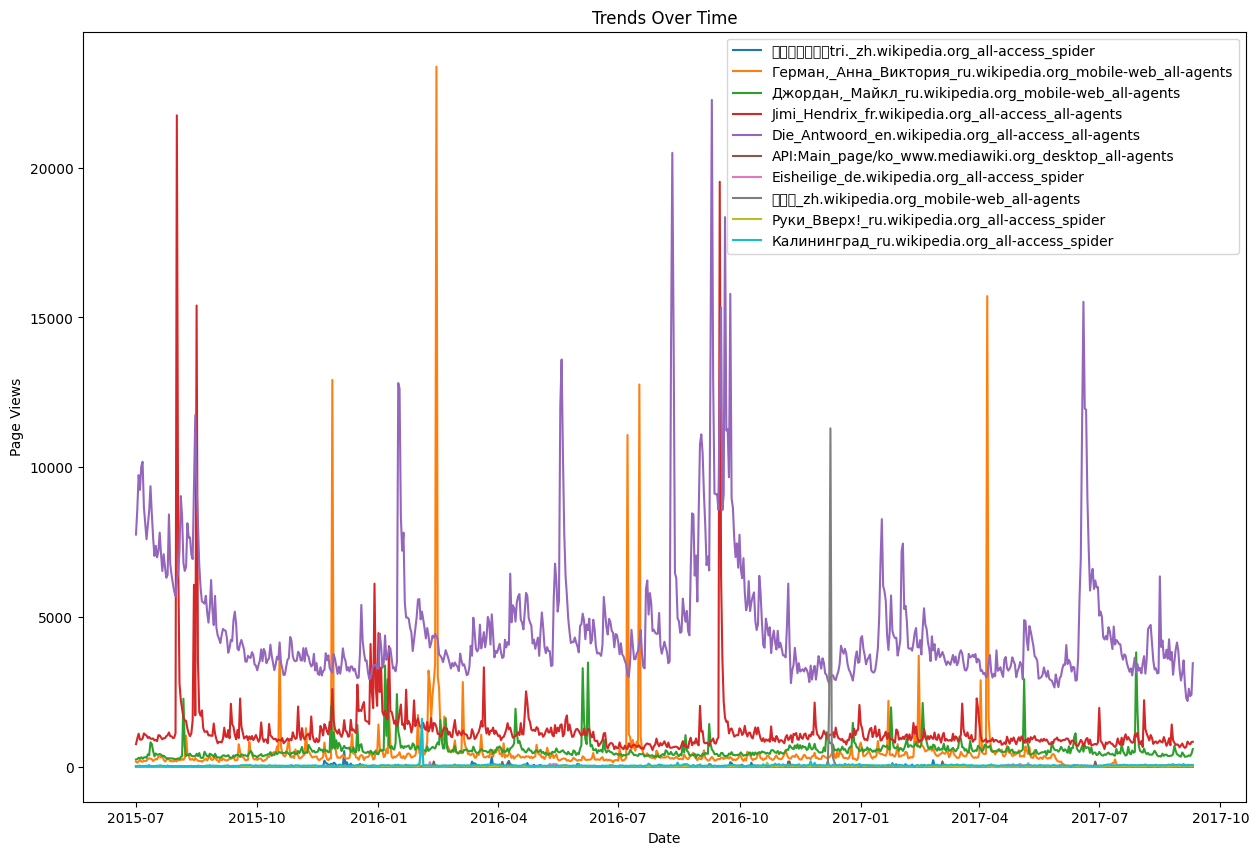

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 30908 (\N{CJK UNIFIED IDEOGRAPH-78BC}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 26292 (\N{CJK UNIFIED IDEOGRAPH-66B4}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.draw()
/home/meril/Doc

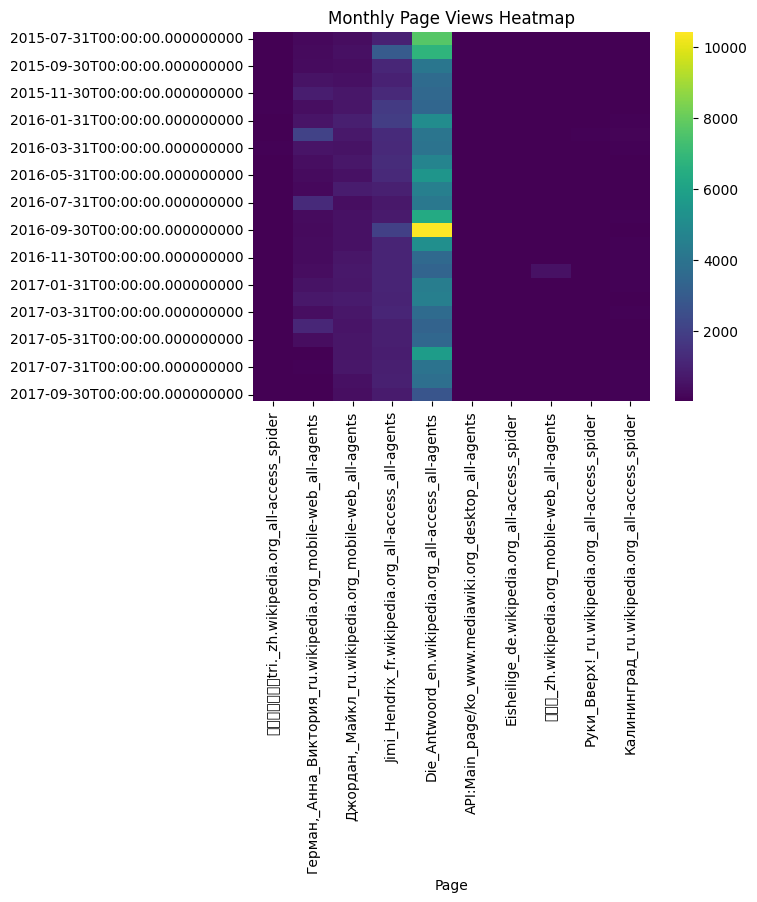

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30908 (\N{CJK UNIFIED IDEOGRAPH-78BC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26292 (\N{CJK UNIFIED IDEOGRAPH-66B4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/c

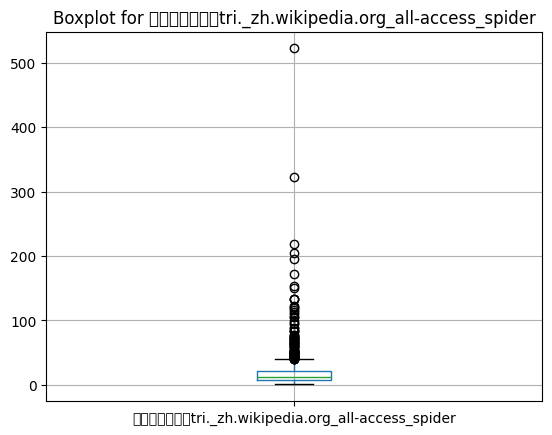

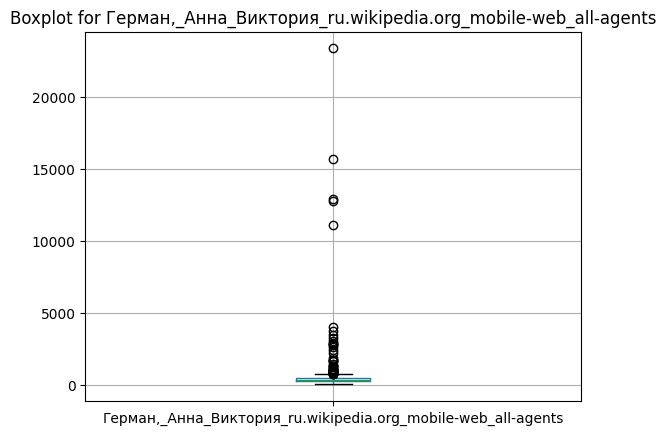

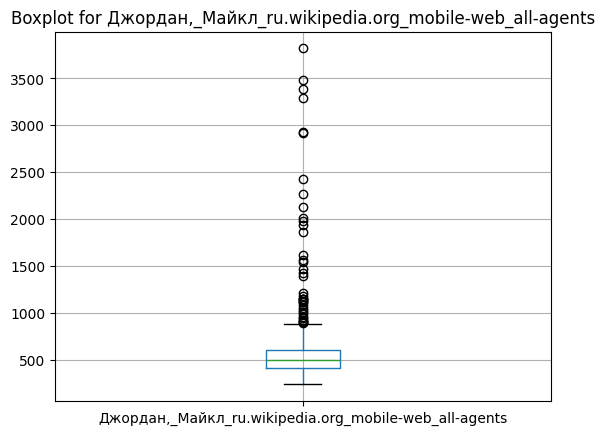

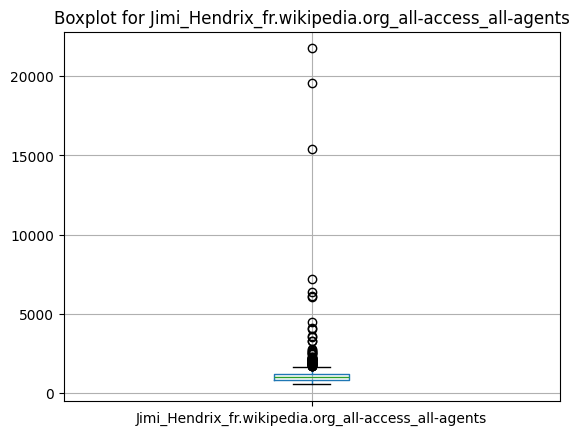

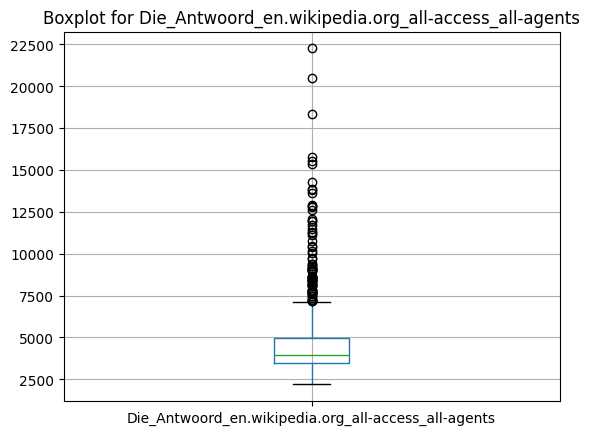

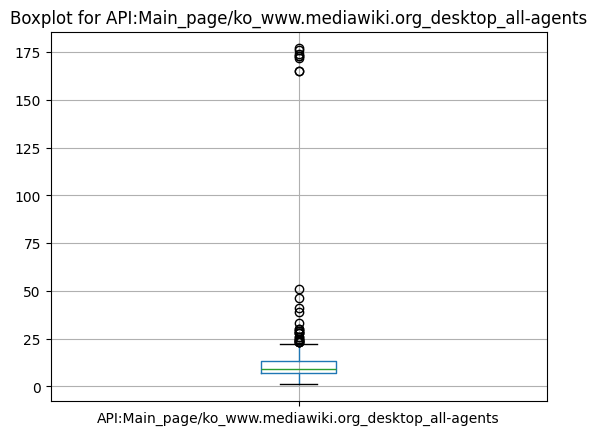

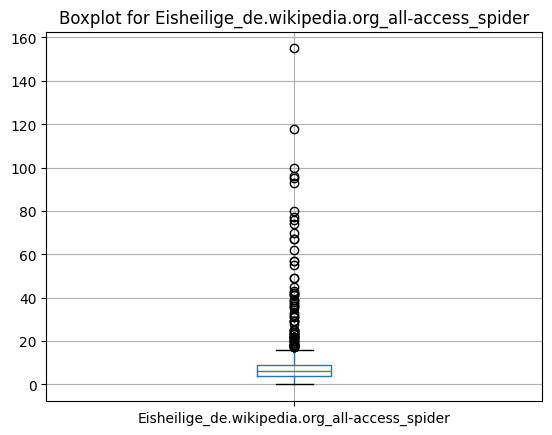

/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34809 (\N{CJK UNIFIED IDEOGRAPH-87F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29556 (\N{CJK UNIFIED IDEOGRAPH-7374}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


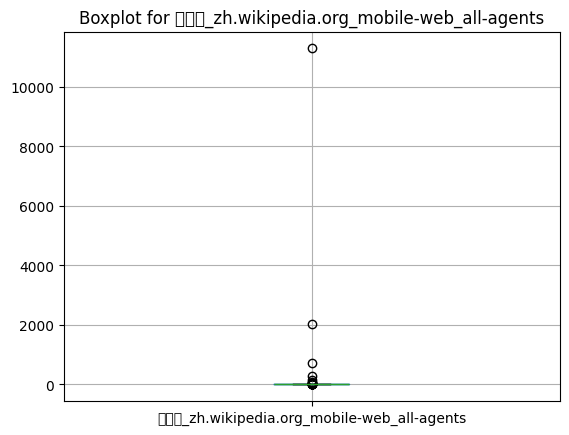

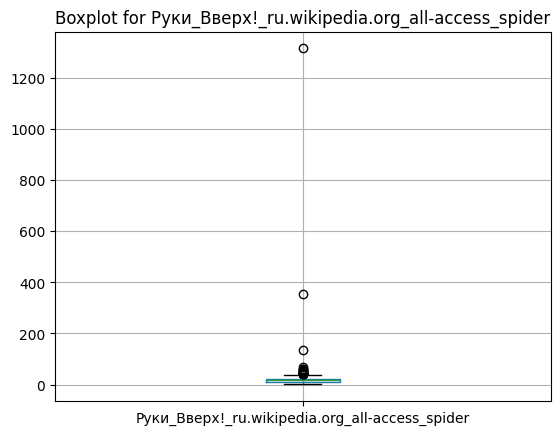

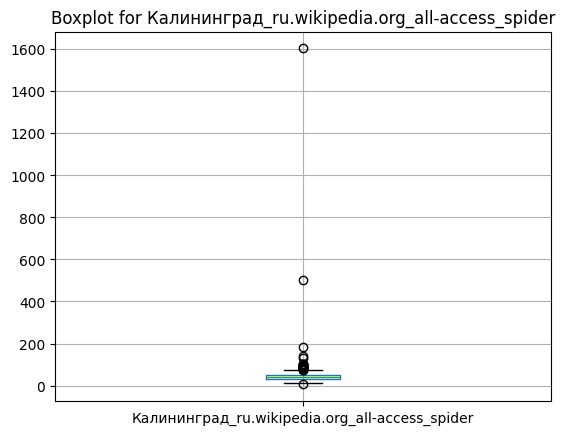

In [40]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Plotting trends over time for each page
plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Trends Over Time')
plt.legend()
plt.show()

# Checking for seasonality (monthly)
monthly_views = df.resample('M').mean()
sns.heatmap(monthly_views, cmap='viridis')
plt.title('Monthly Page Views Heatmap')
plt.show()

# Identifying outliers (a simple approach)
for column in df.columns:
    df.boxplot(column)
    plt.title(f'Boxplot for {column}')
    plt.show()


Most Viewed Page: Die_Antwoord_en.wikipedia.org_all-access_all-agents - Average Views: 4682.992528019925
Least Viewed Page: Eisheilige_de.wikipedia.org_all-access_spider - Average Views: 9.250311332503113


/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 30908 (\N{CJK UNIFIED IDEOGRAPH-78BC}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 26292 (\N{CJK UNIFIED IDEOGRAPH-66B4}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 40845 (\N{CJK UNIFIED IDEOGRAPH-9F8D}) missing from current font.
  fig.canvas.draw()
/home/meril/Documents/UPM/WebTraffic/venv/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.draw()
/home/meril/Doc

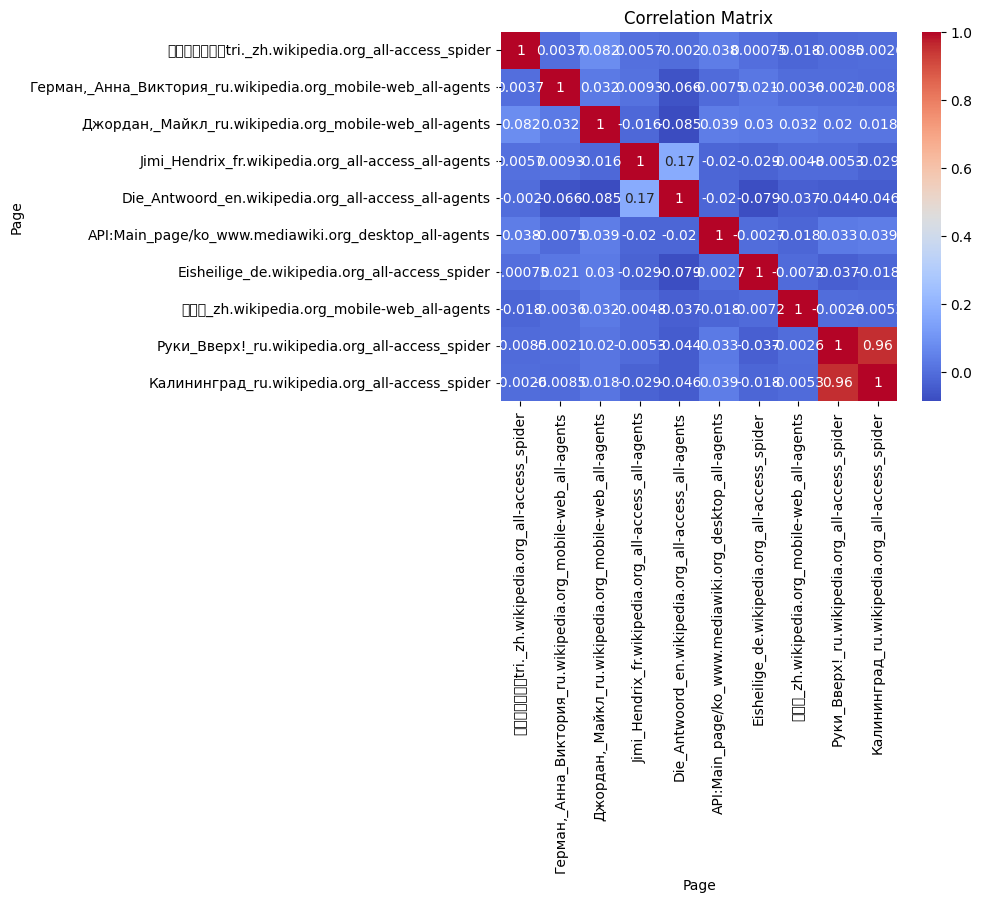

In [41]:
# Most and Least Viewed
average_views = df.mean()
print("Most Viewed Page:", average_views.idxmax(), "- Average Views:", average_views.max())
print("Least Viewed Page:", average_views.idxmin(), "- Average Views:", average_views.min())

# Correlations
correlations = df.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Trends Over Time Plot
The line chart shows the daily page views for different Wikipedia pages over time. The plot reveals that while most days have relatively low views, there are sporadic spikes in traffic for certain pages. These spikes may correspond to particular events that drew public attention to these topics.
The traffic for different pages doesn't appear to follow a single common trend, suggesting that the factors influencing page views may be page-specific.
It's important to note that spikes in web traffic can sometimes be due to bot activity or special events and may not always reflect genuine user interest.
### Monthly Page Views Heatmap
The heatmap visualizes the monthly average page views for each Wikipedia page. The varying colors indicate the relative number of views; darker colors typically represent higher views.
There seems to be some variance month-to-month, but without a clear pattern of seasonality, which is consistent with the data being stationary as indicated by the ADF test results.
Certain pages may show periods of increased activity which could warrant further investigation to understand the reasons behind these changes.
### Boxplot Visualizations
Boxplots are used to show the distribution of page views for each Wikipedia page. The central box represents the middle 50% of the data (from the first quartile to the third quartile), and the horizontal line inside the box is the median.
Outliers are shown as dots outside the 'whiskers' of the boxplot, which extend to 1.5 times the interquartile range. These outliers indicate days with unusually high page views.
Some pages exhibit a larger number of outliers, which might be indicative of viral events or data errors. These outliers could also influence the stationarity of the data if they represent changes in the underlying process generating the views.
### Correlation Matrix
The correlation matrix heatmap shows how page views are correlated between different Wikipedia pages. A correlation close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a correlation close to 0 indicates no linear relationship.
Most pages have low correlations with each other, suggesting that the page views are fairly independent. This is expected as different Wikipedia pages often cover diverse topics, and their view counts are likely influenced by different factors.
There are a few pairs with moderate positive correlations, which may suggest related content or simultaneous events affecting those pages.
In summary, while the dataset is stationary as indicated by the ADF tests, the visualizations show that page views are subject to irregular spikes and vary across pages and over time. The lack of strong correlations between different pages suggests that these spikes are likely due to page- or event-specific factors rather than a common underlying cause.

In [43]:
from statsmodels.tsa.stattools import adfuller





adf_results = {}

for column in df.columns:
    # Perform the Augmented Dickey-Fuller test
    result = adfuller(df[column].dropna())  
    adf_results[column] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4],
        'Stationarity': result[0] < result[4]["5%"]
    }

for page, result in adf_results.items():
    print(f'Results for {page}:')
    print(f'ADF Statistic: {result["ADF Statistic"]}')
    print(f'p-value: {result["p-value"]}')
    print('Critical Values:')
    for key, value in result['Critical Values'].items():
        print(f'\t{key}: {value}')
    print(f'Stationarity: {"Stationary" if result["Stationarity"] else "Not Stationary"}\n')


Results for 數碼暴龍大冒險tri._zh.wikipedia.org_all-access_spider:
ADF Statistic: -4.085105767070963
p-value: 0.0010249083214851793
Critical Values:
	1%: -3.438707722728768
	5%: -2.8652288644673125
	10%: -2.568734303622865
Stationarity: Stationary

Results for Герман,_Анна_Виктория_ru.wikipedia.org_mobile-web_all-agents:
ADF Statistic: -6.8500920250302295
p-value: 1.703003259215904e-09
Critical Values:
	1%: -3.4386126789104074
	5%: -2.865186972298872
	10%: -2.5687119871327146
Stationarity: Stationary

Results for Джордан,_Майкл_ru.wikipedia.org_mobile-web_all-agents:
ADF Statistic: -9.65985035993288
p-value: 1.3627366584463623e-16
Critical Values:
	1%: -3.4385608049885876
	5%: -2.865164107438179
	10%: -2.5686998068142124
Stationarity: Stationary

Results for Jimi_Hendrix_fr.wikipedia.org_all-access_all-agents:
ADF Statistic: -4.578750370074161
p-value: 0.00014133381355065777
Critical Values:
	1%: -3.438697054464251
	5%: -2.8652241623148678
	10%: -2.5687317987167284
Stationarity: Stationary

R

For ALL of the pages: The ADF statistics are less than the critical values at the 5% significance level, and the p-values are low (significantly below 0.05). This indicates that we can reject the null hypothesis of the presence of a unit root, and we can consider these time series to be stationary. This means the statistical properties (mean, variance) of these series do not change over time, making them predictable and suitable for most time series analysis methods.

For the page "Universal_Serial_Bus_de.wikipedia.org_all-access_all-agents": The ADF statistic is not less than the critical value at the 5% significance level, and the p-value is above 0.05. This suggests that we cannot reject the null hypothesis, and this time series may have a unit root, indicating it is non-stationary. This means that the time series may contain a trend or seasonal effects that could affect its behavior over time.

To summarize:

Stationarity: The  pages exhibit stationary behavior, implying that they do not show trends or seasonality over the time period of the data.
